# Sign Language Classification Images

This application user the data from https://github.com/ardamavi/Sign-Language-Digits-Dataset

In [1]:
from fastai.vision import *

In [2]:
path = Path('.')

In [3]:
path.ls()

[WindowsPath('.ipynb_checkpoints'),
 WindowsPath('data'),
 WindowsPath('Sign-Language-Classification-With-Images.ipynb')]

In [4]:
path = path/'data'/'Dataset'

In [5]:
path.ls()

[WindowsPath('data/Dataset/0'),
 WindowsPath('data/Dataset/1'),
 WindowsPath('data/Dataset/2'),
 WindowsPath('data/Dataset/3'),
 WindowsPath('data/Dataset/4'),
 WindowsPath('data/Dataset/5'),
 WindowsPath('data/Dataset/6'),
 WindowsPath('data/Dataset/7'),
 WindowsPath('data/Dataset/8'),
 WindowsPath('data/Dataset/9')]

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

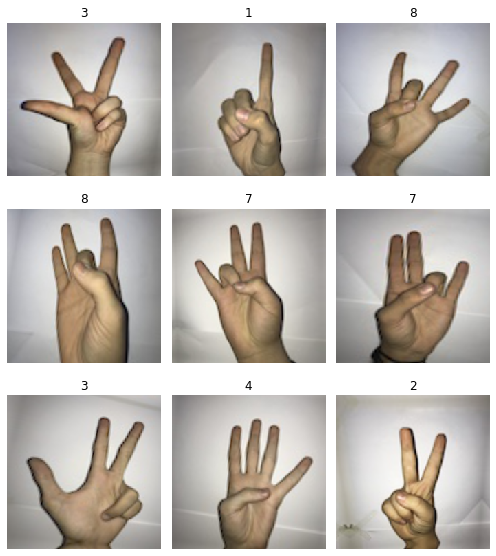

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 10, 1650, 412)

## Training Model

### resnet34 architecture

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.350432,0.816038,0.305825,00:26
1,1.447664,0.595985,0.201456,00:24
2,1.037536,0.422121,0.150485,00:23
3,0.804168,0.406473,0.135922,00:23


In [12]:
learn.save('stage-1')

In [13]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


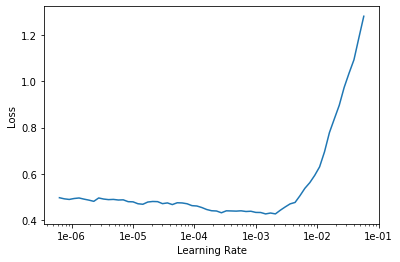

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.423677,0.295391,0.097087,00:23
1,0.285859,0.153732,0.043689,00:23


In [17]:
learn.save('stage-2')

In [18]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.143536,0.119023,0.029126,00:24
1,0.106783,0.100450,0.024272,00:24


In [19]:
learn.save('stage-3')

In [20]:
learn.load('stage-3');

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

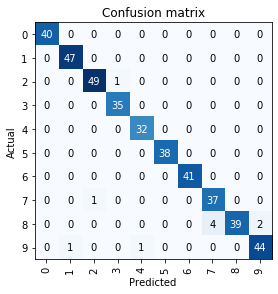

In [22]:
interp.plot_confusion_matrix()

In [23]:
interp.most_confused(min_val=2)

[('8', '7', 4), ('8', '9', 2)]

### resnet50 architecture

In [40]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


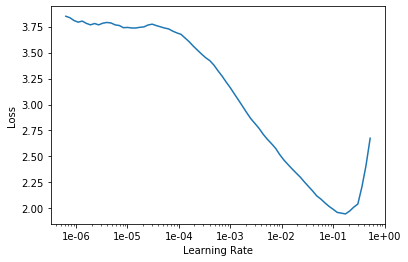

In [41]:
learn.lr_find()
learn.recorder.plot()

In [43]:
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.974465,0.920587,0.276699,0.723301,00:24
1,1.105103,0.288800,0.099515,0.900485,00:24
2,0.669778,0.165948,0.050971,0.949029,00:24
3,0.432789,0.140268,0.053398,0.946602,00:24
4,0.296090,0.126537,0.033981,0.966019,00:24


In [44]:
learn.save('stage-m50-1')

In [45]:
learn.unfreeze()

In [46]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.132388,0.143303,0.048544,0.951456,00:26
1,0.107522,0.099689,0.024272,0.975728,00:26


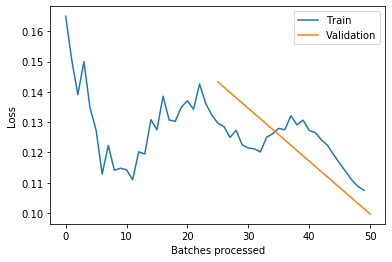

In [47]:
learn.recorder.plot_losses()

In [48]:
learn.save('stage-m50-2')

In [49]:
interp = ClassificationInterpretation.from_learner(learn)

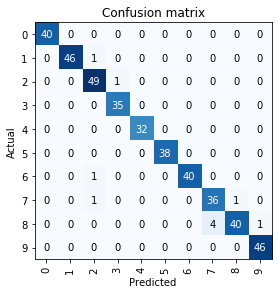

In [50]:
interp.plot_confusion_matrix()

In [51]:
interp.most_confused(min_val=2)

[('8', '7', 4)]

In [52]:
learn.export()

In [53]:
defaults.device = torch.device('cpu')

In [54]:
learn = load_learner(path)

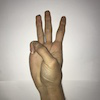

In [55]:
img = open_image(path/'6'/'IMG_5396.jpg')
img

In [56]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category 6